In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("base_enriquecida_codigos")
df.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725


In [3]:
df1=df[df["CO_UNID"]==10]

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Data columns (total 12 columns):
ANO-MES                978971 non-null object
CO_NCM                 978971 non-null int64
CO_UNID                978971 non-null int64
CO_PAIS                978971 non-null int64
SG_UF_NCM              978971 non-null object
CO_VIA                 978971 non-null int64
CO_URF                 978971 non-null int64
QT_ESTAT               978971 non-null int64
KG_LIQUIDO             978971 non-null int64
VL_FOB                 978971 non-null int64
câmbio_mês_atual       978971 non-null float64
câmbio_mês_anterior    978971 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 97.1+ MB


In [5]:
df1["VL_FOB/KG_LIQUIDO"]=df1["VL_FOB"]/df1["KG_LIQUIDO"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Data columns (total 13 columns):
ANO-MES                978971 non-null object
CO_NCM                 978971 non-null int64
CO_UNID                978971 non-null int64
CO_PAIS                978971 non-null int64
SG_UF_NCM              978971 non-null object
CO_VIA                 978971 non-null int64
CO_URF                 978971 non-null int64
QT_ESTAT               978971 non-null int64
KG_LIQUIDO             978971 non-null int64
VL_FOB                 978971 non-null int64
câmbio_mês_atual       978971 non-null float64
câmbio_mês_anterior    978971 non-null float64
VL_FOB/KG_LIQUIDO      978971 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 104.6+ MB


In [7]:
df1[df1["KG_LIQUIDO"]==0]

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,VL_FOB/KG_LIQUIDO


In [8]:
# cáculo dos primeiros e terceiros quartis

# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

In [10]:
df2 = df1.groupby(["CO_NCM"]).agg({'VL_FOB/KG_LIQUIDO':['count', q25, q75] }).reset_index()

In [11]:
df2.head()

CO_NCM VL_FOB/KG_LIQUIDO                      
                       count        q25        q75
0  2012020                 6  12.001786  12.009583
1  2012090                24   4.397079   8.653053
2  2013000               177   6.073510   8.917914
3  2022020                 1  12.099119  12.099119
4  2022090                45   6.300000   8.008107

In [12]:
df2.columns = df2.columns.droplevel()

In [16]:
df2.columns[0]

''

In [17]:
df2.rename(columns={'': 'CO_NCM'}, inplace = True)

In [20]:
# cáculo da distância interquartílica
df2["iqr"]=df2["q75"]-df2["q25"]

In [22]:
# cálculo dos limites inferior e superior para cálculo dos outliers
df2["lower"]= df2["q25"] - (df2["iqr"] * 1.5) 
df2["upper"]= df2["q75"] + (df2["iqr"] * 1.5) 

In [25]:
df2.head()

,CO_NCM,count,q25,q75,iqr,lower,upper
0,2012020,6,12.001786,12.009583,0.007798,11.990089,12.021280
1,2012090,24,4.397079,8.653053,4.255973,-1.986880,15.037012
2,2013000,177,6.073510,8.917914,2.844403,1.806905,13.184519
3,2022020,1,12.099119,12.099119,0.000000,12.099119,12.099119
4,2022090,45,6.300000,8.008107,1.708107,3.737840,10.570267


Realizar o merge do dataframe acima (em quwe foram calculados os limites para fins de apuração dos outliers) com o df1 (dataframe principal, já com o filtro para restringir os registros a CO_UNID = 10)

In [26]:
df3=pd.merge(df1, df2, how='left', on=['CO_NCM'])
df3

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,VL_FOB/KG_LIQUIDO,count,q25,q75,iqr,lower,upper
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,22.351557,2687,13.095690,49.192708,36.097018,-41.049838,103.338236
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725,3.368066,565,3.048369,13.200000,10.151631,-12.179078,28.427447
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725,3.469651,1176,2.175126,7.769919,5.594793,-6.217064,16.162109
3,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,8.702970,5046,18.662319,124.953757,106.291438,-140.774838,284.390914
4,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,4.271856,1134,12.105530,69.208333,57.102803,-73.548675,154.862538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978966,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,2.158157,1573,8.976834,30.666667,21.689833,-23.557915,63.201416
978967,2019-08,29221999,10,767,SP,4,817700,1,1,476,4.019382,3.778713,476.000000,270,17.036928,204.910714,187.873786,-264.773751,486.721394
978968,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,4.019382,3.778713,9.030600,72,6.000202,27.957326,21.957124,-26.935483,60.893011
978969,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,4.019382,3.778713,2.712109,278,2.088746,5.147684,3.058938,-2.499662,9.736092


In [27]:
df3["eh_outlier"]=0

In [28]:
df3.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'VL_FOB/KG_LIQUIDO', 'count', 'q25', 'q75',
       'iqr', 'lower', 'upper', 'eh_outlier'],
      dtype='object')

In [52]:
df3.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            978961, 978962, 978963, 978964, 978965, 978966, 978967, 978968,
            978969, 978970],
           dtype='int64', length=978971)

In [64]:
i=0
for i in df3.index:
    if (df3["VL_FOB/KG_LIQUIDO"][i] < df3["lower"][i]) | (df3["VL_FOB/KG_LIQUIDO"][i] > df3["upper"][i]) :
        df3["eh_outlier"][i]=1



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
# quantidade de outliers (corresponde aos registros iguais a 1):
df3["eh_outlier"].value_counts()

0    865951
1    113020
Name: eh_outlier, dtype: int64

In [72]:
df4=df3[df3["eh_outlier"]==0]

## Na sequência, buscar-se-á repetir os procedimentos já realizados anteriormente (no âmbito do Jupyter Notebook "04b - modelo ML filtro CO_UNID igual a 10"), porém, dessa vez, o dataset encontra-se sem os outliers

###### Checando códigos NCM recorrentes

In [74]:
# checando quais os códigos NCM mais recorrentes, tendo em vista que não foi possível "dummizar" todos em teste anteriormente realizado
g1=df4.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
3314,39269090,10018
4912,73181500,8001
4948,73269090,7239
3395,40169300,7089
5542,85444200,6644
...,...,...
1270,29042030,1
3727,52053500,1
5043,76042911,1
3717,52051500,1


In [75]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [76]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [77]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [78]:
g2.head()

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
3314,39269090,10018,0.011569,0.011569
4912,73181500,8001,0.009240,0.020808
4948,73269090,7239,0.008360,0.029168
3395,40169300,7089,0.008186,0.037354
5542,85444200,6644,0.007672,0.045027


In [79]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 2842 códigos NCM dentre os 5809.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
3314,39269090,10018,0.011569,0.011569
4912,73181500,8001,0.009240,0.020808
4948,73269090,7239,0.008360,0.029168
3395,40169300,7089,0.008186,0.037354
5542,85444200,6644,0.007672,0.045027
...,...,...,...,...
5650,90211091,42,0.000049,0.949782
644,21032090,42,0.000049,0.949831
1807,29241992,42,0.000049,0.949879
5211,82129000,42,0.000049,0.949928


In [80]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
2167,29362811,42,0.000049,0.950025
4972,74091100,42,0.000049,0.950073
1415,29121100,42,0.000049,0.950122
3626,48203000,42,0.000049,0.950170
725,25090000,42,0.000049,0.950219
...,...,...,...,...
1270,29042030,1,0.000001,0.999995
3727,52053500,1,0.000001,0.999997
5043,76042911,1,0.000001,0.999998
3717,52051500,1,0.000001,0.999999


In [81]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [82]:
mask=df4['CO_NCM'].isin(idx)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
978966    False
978967    False
978968    False
978969    False
978970     True
Name: CO_NCM, Length: 865951, dtype: bool

In [83]:
df4["CO_NCM_final"]=df4["CO_NCM"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df4.loc[mask, "CO_NCM_final"] = 99999999

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
df4

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,câmbio_mês_anterior,VL_FOB/KG_LIQUIDO,count,q25,q75,iqr,lower,upper,eh_outlier,CO_NCM_final
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,4.154725,22.351557,2687,13.095690,49.192708,36.097018,-41.049838,103.338236,0,39263000
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,4.154725,3.368066,565,3.048369,13.200000,10.151631,-12.179078,28.427447,0,38249929
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,4.154725,3.469651,1176,2.175126,7.769919,5.594793,-6.217064,16.162109,0,34021300
3,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,4.154725,8.702970,5046,18.662319,124.953757,106.291438,-140.774838,284.390914,0,85389090
4,2019-12,85030010,10,386,SP,4,817600,835,835,3567,...,4.154725,4.271856,1134,12.105530,69.208333,57.102803,-73.548675,154.862538,0,85030010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978966,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,...,3.778713,2.158157,1573,8.976834,30.666667,21.689833,-23.557915,63.201416,0,84339090
978967,2019-08,29221999,10,767,SP,4,817700,1,1,476,...,3.778713,476.000000,270,17.036928,204.910714,187.873786,-264.773751,486.721394,0,29221999
978968,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,...,3.778713,9.030600,72,6.000202,27.957326,21.957124,-26.935483,60.893011,0,12122900
978969,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,...,3.778713,2.712109,278,2.088746,5.147684,3.058938,-2.499662,9.736092,0,39079919


In [86]:
df4["CO_NCM_final"].value_counts()

99999999    43318
39269090    10018
73181500     8001
73269090     7239
40169300     7089
            ...  
82129000       42
3049400        42
90211091       42
21032090       42
29241992       42
Name: CO_NCM_final, Length: 2843, dtype: int64

###### Não há necessidade de trabalhar com a variável ref aos códigos UNID MED EST (CO_UNID) recorrentes, pois o df está restrito ao CO_UNID=10

###### Checando países (CO_PAIS) recorrentes

In [87]:
g1=df4.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
39,160,174317
61,249,99778
3,23,75498
96,386,51481
68,275,31606
...,...,...
164,695,1
139,551,1
42,165,1
65,259,1


In [88]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [89]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [90]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [91]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
39,160,174317,0.201301,0.201301
61,249,99778,0.115224,0.316525
3,23,75498,0.087185,0.403710
96,386,51481,0.059450,0.463160
68,275,31606,0.036499,0.499659


In [93]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restringem a 39 países dentre os 207.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 39 to 60
Data columns (total 4 columns):
CO_PAIS             39 non-null int64
contagem            39 non-null int64
% CO_PAIS           39 non-null float64
% CO_PAIS ACUMUL    39 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [94]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
146,586,3205,0.003701,0.953381
160,676,2802,0.003236,0.956616
135,538,2589,0.002990,0.959606
147,589,2485,0.002870,0.962476
93,375,2469,0.002851,0.965327
...,...,...,...,...
164,695,1,0.000001,0.999995
139,551,1,0.000001,0.999997
42,165,1,0.000001,0.999998
65,259,1,0.000001,0.999999


In [95]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [100]:
mask=df4['CO_PAIS'].isin(idx)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
978966    False
978967    False
978968     True
978969    False
978970    False
Name: CO_PAIS, Length: 865951, dtype: bool

In [101]:
df4["CO_PAIS_final"]=df4["CO_PAIS"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df4.loc[mask, "CO_PAIS_final"] = 999

In [103]:
df4

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,VL_FOB/KG_LIQUIDO,count,q25,q75,iqr,lower,upper,eh_outlier,CO_NCM_final,CO_PAIS_final
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,22.351557,2687,13.095690,49.192708,36.097018,-41.049838,103.338236,0,39263000,23
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,3.368066,565,3.048369,13.200000,10.151631,-12.179078,28.427447,0,38249929,493
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,3.469651,1176,2.175126,7.769919,5.594793,-6.217064,16.162109,0,34021300,493
3,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,8.702970,5046,18.662319,124.953757,106.291438,-140.774838,284.390914,0,85389090,386
4,2019-12,85030010,10,386,SP,4,817600,835,835,3567,...,4.271856,1134,12.105530,69.208333,57.102803,-73.548675,154.862538,0,85030010,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978966,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,...,2.158157,1573,8.976834,30.666667,21.689833,-23.557915,63.201416,0,84339090,63
978967,2019-08,29221999,10,767,SP,4,817700,1,1,476,...,476.000000,270,17.036928,204.910714,187.873786,-264.773751,486.721394,0,29221999,767
978968,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,...,9.030600,72,6.000202,27.957326,21.957124,-26.935483,60.893011,0,12122900,999
978969,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,...,2.712109,278,2.088746,5.147684,3.058938,-2.499662,9.736092,0,39079919,275


In [104]:
df4["CO_PAIS_final"].value_counts()

160    174317
249     99778
23      75498
386     51481
999     43575
275     31606
399     31409
361     29125
245     27915
190     23908
628     21497
161     20882
63      18275
493     17892
764     13724
573     13663
767     11745
87      11638
149     10829
72      10810
351     10328
776     10230
791      9893
603      9669
827      9422
607      7573
365      7299
232      6778
271      6399
858      6320
455      6035
355      5752
158      5498
845      3988
383      3821
741      3672
670      3641
169      3386
105      3345
247      3335
Name: CO_PAIS_final, dtype: int64

###### Checando unidades federadas (SG_UF_NCM) recorrentes

In [105]:
g1=df4.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,336535
23,SC,107034
17,PR,74251
18,RJ,60658
10,MG,59267
22,RS,58481
2,AM,37918
4,BA,23442
7,ES,18583
8,GO,14999


In [106]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [107]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [108]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [109]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,336535,0.388631,0.388631
23,SC,107034,0.123603,0.512233
17,PR,74251,0.085745,0.597978
18,RJ,60658,0.070048,0.668026
10,MG,59267,0.068442,0.736468


In [110]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável SG_UF_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restringem a 12 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,336535,0.388631,0.388631
23,SC,107034,0.123603,0.512233
17,PR,74251,0.085745,0.597978
18,RJ,60658,0.070048,0.668026
10,MG,59267,0.068442,0.736468
22,RS,58481,0.067534,0.804002
2,AM,37918,0.043788,0.847789
4,BA,23442,0.027071,0.874860
7,ES,18583,0.021460,0.896320
8,GO,14999,0.017321,0.913641


In [111]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
20,RO,10854,0.012534,0.957178
1,AL,9344,0.010790,0.967968
13,PA,6441,0.007438,0.975406
11,MS,4807,0.005551,0.980957
6,DF,2876,0.003321,0.984279
14,PB,2787,0.003218,0.987497
19,RN,2613,0.003017,0.990514
24,SE,2353,0.002717,0.993232
12,MT,2106,0.002432,0.995664
9,MA,1034,0.001194,0.996858


In [112]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [113]:
mask=df4['SG_UF_NCM'].isin(idx)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
978966    False
978967    False
978968    False
978969    False
978970    False
Name: SG_UF_NCM, Length: 865951, dtype: bool

In [118]:
df4["SG_UF_NCM_final"]=df4["SG_UF_NCM"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df4.loc[mask, "SG_UF_NCM_final"] = 99

In [120]:
df4

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,count,q25,q75,iqr,lower,upper,eh_outlier,CO_NCM_final,CO_PAIS_final,SG_UF_NCM_final
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,2687,13.095690,49.192708,36.097018,-41.049838,103.338236,0,39263000,23,SP
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,565,3.048369,13.200000,10.151631,-12.179078,28.427447,0,38249929,493,SP
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,1176,2.175126,7.769919,5.594793,-6.217064,16.162109,0,34021300,493,BA
3,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,5046,18.662319,124.953757,106.291438,-140.774838,284.390914,0,85389090,386,SC
4,2019-12,85030010,10,386,SP,4,817600,835,835,3567,...,1134,12.105530,69.208333,57.102803,-73.548675,154.862538,0,85030010,386,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978966,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,...,1573,8.976834,30.666667,21.689833,-23.557915,63.201416,0,84339090,63,RS
978967,2019-08,29221999,10,767,SP,4,817700,1,1,476,...,270,17.036928,204.910714,187.873786,-264.773751,486.721394,0,29221999,767,SP
978968,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,...,72,6.000202,27.957326,21.957124,-26.935483,60.893011,0,12122900,999,SP
978969,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,...,278,2.088746,5.147684,3.058938,-2.499662,9.736092,0,39079919,275,SP


In [121]:
df4["SG_UF_NCM_final"].value_counts()

SP    336535
SC    107034
PR     74251
RJ     60658
MG     59267
RS     58481
99     47936
AM     37918
BA     23442
ES     18583
GO     14999
PE     14654
CE     12193
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [122]:
g1=df4.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
1,1,520436
3,4,311144
6,7,26436
0,0,7089
9,10,617
4,5,130
8,9,42
5,6,29
2,2,15
7,8,13


In [123]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [124]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [125]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [126]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
1,1,520436,0.600999,0.600999
3,4,311144,0.359309,0.960308
6,7,26436,0.030528,0.990837
0,0,7089,0.008186,0.999023
9,10,617,0.000713,0.999736
4,5,130,0.000150,0.999886
8,9,42,0.000049,0.999934
5,6,29,0.000033,0.999968
2,2,15,0.000017,0.999985
7,8,13,0.000015,1.000000


In [132]:
df4["CO_VIA_final"]=df4["CO_VIA"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
mask=(df4['CO_VIA']!=1) & (df4['CO_VIA']!=4) & (df4['CO_VIA']!=7)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
978966    False
978967    False
978968    False
978969    False
978970    False
Name: CO_VIA, Length: 865951, dtype: bool

In [134]:
df4.loc[mask, "CO_VIA_final"] = 99

In [135]:
df4["CO_VIA_final"].value_counts()

1     520436
4     311144
7      26436
99      7935
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/KG_LIQUIDO)

In [136]:
df_encoded = pd.concat([df4, pd.get_dummies(df4["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,1
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,1


In [139]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96151100,NCM_96151900,NCM_96159000,NCM_96161000,NCM_96162000,NCM_96170010,NCM_96170020,NCM_96180000,NCM_96190000,NCM_99999999
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,0
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Não precisa trabalhar com a variável CO_UNID, pois esse df é uma fração do df original (mediante filtro CO_UNID=10)
#df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
#df_encoded.head(3)

In [140]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_845,Pais_858,Pais_999
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,0
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_CE,UF_ES,UF_GO,UF_MG,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,1
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
0,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,1,1,0,0,0
1,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,1,1,0,0,0
2,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,1,0,0,0


In [145]:
# identificando colunas a excluir (usei o df4, pois a usar o df_encoded aparecia muitos nomes e atrapalhava a seleção)
df4.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'VL_FOB/KG_LIQUIDO', 'count', 'q25', 'q75',
       'iqr', 'lower', 'upper', 'eh_outlier', 'CO_NCM_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'],
      dtype='object')

In [146]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'count', 'q25', 'q75',
       'iqr', 'lower', 'upper', 'eh_outlier', 'CO_NCM_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [147]:
df_encoded.columns

Index(['VL_FOB/KG_LIQUIDO', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06', 'Mês_2019-07',
       'Mês_2019-08', 'Mês_2019-09',
       ...
       'UF_PE', 'UF_PR', 'UF_RJ', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=2913)

In [148]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 2913 entries, VL_FOB/KG_LIQUIDO to Modal_99
dtypes: float64(1), uint8(2912)
memory usage: 2.4 GB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/KG_LIQUIDO"], optou-se por fracionar o df_encoded, dividindo-o em 6 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/KG_LIQUIDO e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [149]:
df_encoded1de6=df_encoded.iloc[:,:500]

In [150]:
df_encoded1de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 500 entries, VL_FOB/KG_LIQUIDO to NCM_29071100
dtypes: float64(1), uint8(499)
memory usage: 425.3 MB


In [151]:
df_encoded2de6=df_encoded.iloc[:,500:1000]

In [152]:
df_encoded2de6["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"] 

In [153]:
df_encoded2de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 501 entries, NCM_29071200 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(500)
memory usage: 426.1 MB


In [154]:
df_encoded3de6=df_encoded.iloc[:,1000:1500]

In [155]:
df_encoded3de6["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"] 

In [156]:
df_encoded3de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 501 entries, NCM_33012922 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(500)
memory usage: 426.1 MB


In [157]:
df_encoded4de6=df_encoded.iloc[:,1500:2000]

In [158]:
df_encoded4de6["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"] 

In [159]:
df_encoded4de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 501 entries, NCM_46021100 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(500)
memory usage: 426.1 MB


In [160]:
df_encoded5de6=df_encoded.iloc[:,2000:2500]

In [161]:
df_encoded5de6["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"] 

In [162]:
df_encoded5de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 501 entries, NCM_72023000 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(500)
memory usage: 426.1 MB


In [163]:
df_encoded6de6=df_encoded.iloc[:,2500:]

In [164]:
df_encoded6de6["VL_FOB/KG_LIQUIDO"]=df_encoded["VL_FOB/KG_LIQUIDO"] 

In [165]:
df_encoded6de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Columns: 414 entries, NCM_84439929 to VL_FOB/KG_LIQUIDO
dtypes: float64(1), uint8(413)
memory usage: 354.3 MB


In [ ]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/KG_LIQUIDO")
#correlacoes = df_encoded.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
#correlacoes

In [166]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de6 = df_encoded1de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes1de6

NCM_28112990         0.000053
NCM_28299050         0.000063
NCM_29055990         0.000077
NCM_28275100         0.000078
NCM_13023100         0.000084
                       ...   
NCM_28444090         0.007092
NCM_12093000         0.009104
NCM_28459000         0.055148
NCM_28439090         0.063845
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 500, dtype: float64

In [167]:
correlacoes2de6 = df_encoded2de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes2de6

NCM_29183010         0.000002
NCM_33012921         0.000012
NCM_29224940         0.000013
NCM_29209049         0.000029
NCM_30023090         0.000043
                       ...   
NCM_29419049         0.048348
NCM_30049068         0.103175
NCM_30049019         0.106039
NCM_30021520         0.116564
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 501, dtype: float64

In [168]:
correlacoes3de6 = df_encoded3de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes3de6

NCM_33013000         0.000029
NCM_40101900         0.000044
NCM_40169300         0.000049
NCM_38151210         0.000077
NCM_42010010         0.000106
                       ...   
NCM_40169990         0.004129
NCM_39269090         0.005041
NCM_39269061         0.005825
NCM_38180010         0.018059
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 501, dtype: float64

In [169]:
correlacoes4de6 = df_encoded4de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes4de6

NCM_56012190         2.706013e-07
NCM_68132000         1.742183e-06
NCM_56022100         2.016160e-06
NCM_67030000         3.785461e-06
NCM_71171100         3.720488e-05
                         ...     
NCM_69091230         3.974536e-03
NCM_71162010         1.646431e-02
NCM_71131100         1.653205e-02
NCM_71131900         5.086040e-02
VL_FOB/KG_LIQUIDO    1.000000e+00
Name: VL_FOB/KG_LIQUIDO, Length: 501, dtype: float64

In [170]:
correlacoes5de6 = df_encoded5de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes5de6

NCM_74199990         0.000003
NCM_81122900         0.000004
NCM_82075019         0.000006
NCM_74101200         0.000018
NCM_84439923         0.000031
                       ...   
NCM_84229090         0.005566
NCM_75089090         0.008395
NCM_84119900         0.011326
NCM_84119100         0.067077
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 501, dtype: float64

In [171]:
correlacoes6de6 = df_encoded6de6.corr().abs()["VL_FOB/KG_LIQUIDO"].sort_values()
correlacoes6de6

NCM_84669330         0.000015
NCM_91149090         0.000023
NCM_91119090         0.000024
NCM_84485930         0.000027
NCM_91139000         0.000040
                       ...   
NCM_90219011         0.048752
Modal_1              0.066183
NCM_99999999         0.070259
Modal_4              0.071138
VL_FOB/KG_LIQUIDO    1.000000
Name: VL_FOB/KG_LIQUIDO, Length: 414, dtype: float64

In [172]:
correlacoes = pd.concat([correlacoes1de6, correlacoes2de6, correlacoes3de6, correlacoes4de6, correlacoes5de6, correlacoes6de6])

In [173]:
correlacoes.drop_duplicates(inplace=True)

In [174]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/KG_LIQUIDO    1.000000
NCM_30021520         0.116564
NCM_30049019         0.106039
NCM_30049068         0.103175
Modal_4              0.071138
NCM_99999999         0.070259
NCM_84119100         0.067077
Modal_1              0.066183
NCM_28439090         0.063845
NCM_28459000         0.055148
NCM_71131900         0.050860
NCM_90219011         0.048752
NCM_29419049         0.048348
UF_GO                0.033204
NCM_29372399         0.030784
NCM_30021590         0.028908
NCM_90211020         0.027144
NCM_29372290         0.022050
NCM_29372349         0.021659
NCM_88033000         0.018648
Name: VL_FOB/KG_LIQUIDO, dtype: float64

In [175]:
# Identificando as features com as maiores correlações (maior ou igual a 0,02) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.02]).index

Index(['NCM_28459000', 'NCM_28439090', 'VL_FOB/KG_LIQUIDO', 'NCM_29372349',
       'NCM_29372290', 'NCM_30021590', 'NCM_29372399', 'NCM_29419049',
       'NCM_30049068', 'NCM_30049019', 'NCM_30021520', 'NCM_71131900',
       'NCM_84119100', 'NCM_90211020', 'UF_GO', 'NCM_90219011', 'Modal_1',
       'NCM_99999999', 'Modal_4'],
      dtype='object')

In [177]:
df5 = df_encoded[(correlacoes[correlacoes >= 0.02]).index]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865951 entries, 0 to 978970
Data columns (total 19 columns):
NCM_28459000         865951 non-null uint8
NCM_28439090         865951 non-null uint8
VL_FOB/KG_LIQUIDO    865951 non-null float64
NCM_29372349         865951 non-null uint8
NCM_29372290         865951 non-null uint8
NCM_30021590         865951 non-null uint8
NCM_29372399         865951 non-null uint8
NCM_29419049         865951 non-null uint8
NCM_30049068         865951 non-null uint8
NCM_30049019         865951 non-null uint8
NCM_30021520         865951 non-null uint8
NCM_71131900         865951 non-null uint8
NCM_84119100         865951 non-null uint8
NCM_90211020         865951 non-null uint8
UF_GO                865951 non-null uint8
NCM_90219011         865951 non-null uint8
Modal_1              865951 non-null uint8
NCM_99999999         865951 non-null uint8
Modal_4              865951 non-null uint8
dtypes: float64(1), uint8(18)
memory usage: 28.1 MB


In [178]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

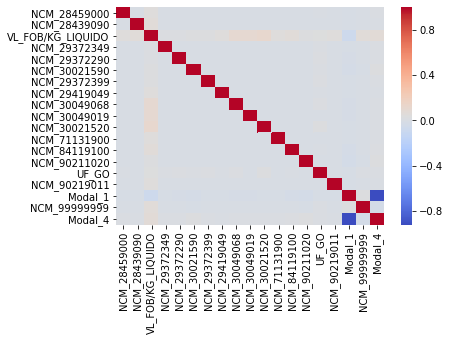

In [180]:
sns.heatmap(df5.corr(),cmap="coolwarm", annot=False )

In [181]:
#Considerando que as Modal_1 e Modal_4 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df5=df5.drop(columns="Modal_4")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [182]:
df5.columns

Index(['NCM_28459000', 'NCM_28439090', 'VL_FOB/KG_LIQUIDO', 'NCM_29372349',
       'NCM_29372290', 'NCM_30021590', 'NCM_29372399', 'NCM_29419049',
       'NCM_30049068', 'NCM_30049019', 'NCM_30021520', 'NCM_71131900',
       'NCM_84119100', 'NCM_90211020', 'UF_GO', 'NCM_90219011', 'Modal_1',
       'NCM_99999999'],
      dtype='object')

In [183]:
x = df5[['NCM_28459000', 'NCM_28439090', 'NCM_29372349',
       'NCM_29372290', 'NCM_30021590', 'NCM_29372399', 'NCM_29419049',
       'NCM_30049068', 'NCM_30049019', 'NCM_30021520', 'NCM_71131900',
       'NCM_84119100', 'NCM_90211020', 'UF_GO', 'NCM_90219011', 'Modal_1',
       'NCM_99999999']]
y = df5['VL_FOB/KG_LIQUIDO']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lm = LinearRegression()

In [188]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
# impressão do intercepto
print(lm.intercept_)

174.75778028869115


In [190]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_28459000,11376.588820
NCM_28439090,13958.976437
NCM_29372349,3711.697087
NCM_29372290,2602.816291
NCM_30021590,1839.251771
NCM_29372399,5371.928036
NCM_29419049,10760.749437
NCM_30049068,15765.831346
NCM_30049019,14805.332713
NCM_30021520,22083.045422


In [191]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [192]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [193]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

In [195]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [196]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [197]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [198]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [199]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

1496.2050680536272

In [200]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

1487.2120456536845

In [201]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

1485.9811303883655

#### Mean absolute error - MAE

In [202]:
from sklearn.metrics import mean_absolute_error

In [203]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

151.86941976665204

In [204]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

132.6574867086767

In [205]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

132.6568811047286

#### Mean squared error - MSE

In [206]:
from sklearn.metrics import mean_absolute_error

In [207]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

2238629.605669359

In [208]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

2211799.668737417

In [209]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

2208139.9198702844

#### Coeficente de determinação - R²

In [210]:
from sklearn.metrics import r2_score

In [211]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.04599063681947091

In [212]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

0.0574244224630599

In [213]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

0.05898405281785002